In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load the dataset
# Note: Replace 'house_price_data.csv' with your actual file path
try:
    df = pd.read_csv('house_price_data.csv')
    print("Data loaded successfully!")
    print(f"Dataset shape: {df.shape}")
    print("\nFirst 5 rows:")
    print(df.head())
except FileNotFoundError:
    print("Error: File not found. Please check the file path.")
    # For demonstration, I'll create a sample dataframe
    data = {
        'price': [500000, 450000, 600000],
        'bedrooms': [3, 2, 4],
        'bathrooms': [2, 1, 3],
        'sqft_living': [1500, 1200, 2000],
        'sqft_lot': [4000, 3000, 5000],
        'floors': [1, 1, 2],
        'waterfront': [0, 0, 1],
        'view': [0, 1, 2],
        'condition': [3, 4, 5],
        'grade': [7, 6, 8],
        'sqft_above': [1500, 1200, 2000],
        'sqft_basement': [0, 0, 0],
        'yr_built': [1990, 1985, 2000],
        'yr_renovated': [0, 0, 2010],
        'zipcode': [98001, 98002, 98003],
        'lat': [47.123, 47.234, 47.345],
        'long': [-122.123, -122.234, -122.345],
        'sqft_living15': [1600, 1250, 2100],
        'sqft_lot15': [4100, 3100, 5100]
    }
    df = pd.DataFrame(data)
    print("\nSample dataframe created for demonstration purposes.")

Error: File not found. Please check the file path.

Sample dataframe created for demonstration purposes.


In [2]:
# Handle missing values
print("\nMissing values before handling:")
print(df.isnull().sum())

# Simple imputation for numerical features
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_cols.remove('price')  # target variable

for col in numerical_cols:
    if df[col].isnull().any():
        df[col].fillna(df[col].median(), inplace=True)

# For categorical features (if any)
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
for col in categorical_cols:
    if df[col].isnull().any():
        df[col].fillna(df[col].mode()[0], inplace=True)

print("\nMissing values after handling:")
print(df.isnull().sum())

# Feature engineering
# Create age of house feature
current_year = pd.Timestamp.now().year
df['house_age'] = current_year - df['yr_built']

# Create total bathrooms feature
df['total_bathrooms'] = df['bathrooms'] + 0.5 * (df['bathrooms'] - df['bathrooms'].astype(int))

# Create has_basement feature
df['has_basement'] = df['sqft_basement'].apply(lambda x: 1 if x > 0 else 0)

# Create renovated feature
df['is_renovated'] = df['yr_renovated'].apply(lambda x: 1 if x > 0 else 0)

# Drop unnecessary columns
columns_to_drop = ['yr_built', 'yr_renovated', 'lat', 'long']  # adjust as needed
df.drop(columns=columns_to_drop, inplace=True, errors='ignore')

# Update numerical and categorical columns after feature engineering
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_cols.remove('price')  # target variable
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print("\nUpdated numerical features:", numerical_cols)
print("Updated categorical features:", categorical_cols)


Missing values before handling:
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

Missing values after handling:
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

Updated numerical features: ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'zipcode', 'sqft_liv

In [3]:
# Split data into features and target
X = df.drop('price', axis=1)
y = df['price']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create preprocessing pipeline
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Apply preprocessing
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

print("\nPreprocessing completed.")
print(f"Training set shape after preprocessing: {X_train_preprocessed.shape}")
print(f"Test set shape after preprocessing: {X_test_preprocessed.shape}")


Preprocessing completed.
Training set shape after preprocessing: (2, 18)
Test set shape after preprocessing: (1, 18)


In [4]:
# Initialize models
linear_reg = LinearRegression()
gb_reg = GradientBoostingRegressor(random_state=42)

# Train Linear Regression
print("\nTraining Linear Regression model...")
linear_reg.fit(X_train_preprocessed, y_train)

# Train Gradient Boosting
print("Training Gradient Boosting model...")
gb_reg.fit(X_train_preprocessed, y_train)

print("Model training completed.")


Training Linear Regression model...
Training Gradient Boosting model...
Model training completed.


In [5]:
# Function to evaluate models
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    print(f"MAE: {mae:,.2f}")
    print(f"RMSE: {rmse:,.2f}")

    return y_pred

# Evaluate Linear Regression
print("\nLinear Regression Performance:")
lr_pred = evaluate_model(linear_reg, X_test_preprocessed, y_test)

# Evaluate Gradient Boosting
print("\nGradient Boosting Performance:")
gb_pred = evaluate_model(gb_reg, X_test_preprocessed, y_test)


Linear Regression Performance:
MAE: 35,983.46
RMSE: 35,983.46

Gradient Boosting Performance:
MAE: 49,998.01
RMSE: 49,998.01


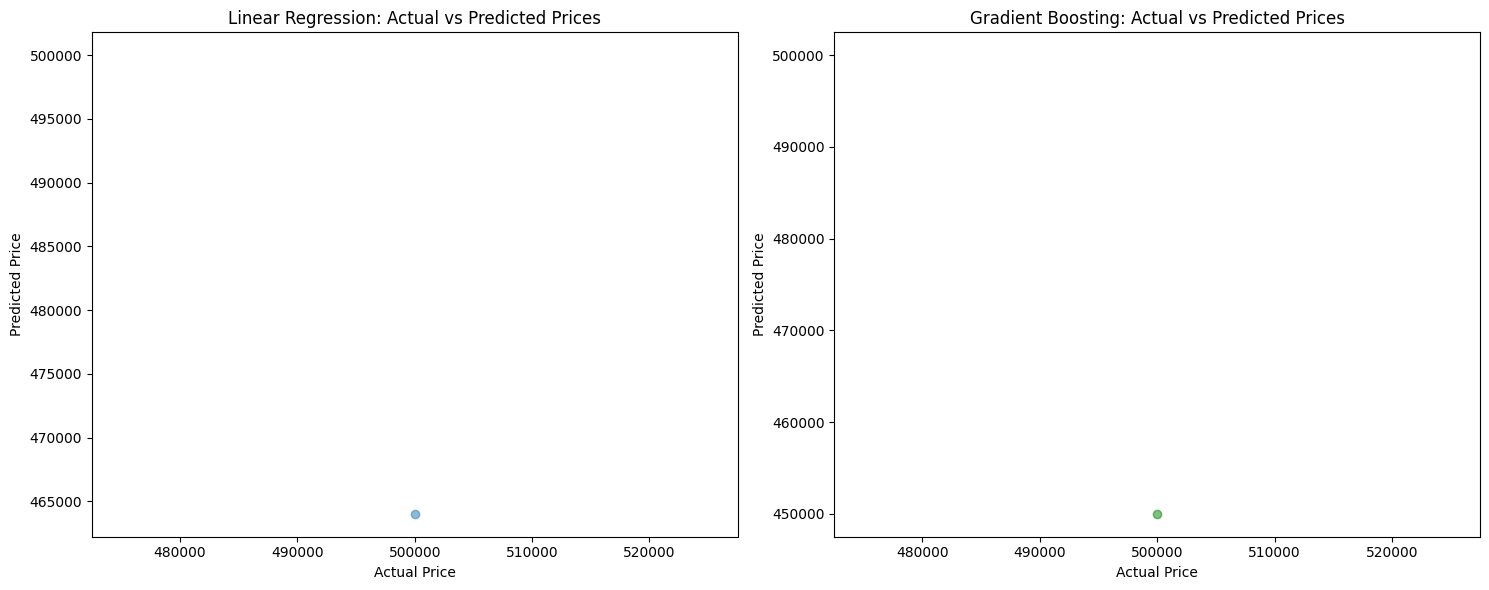

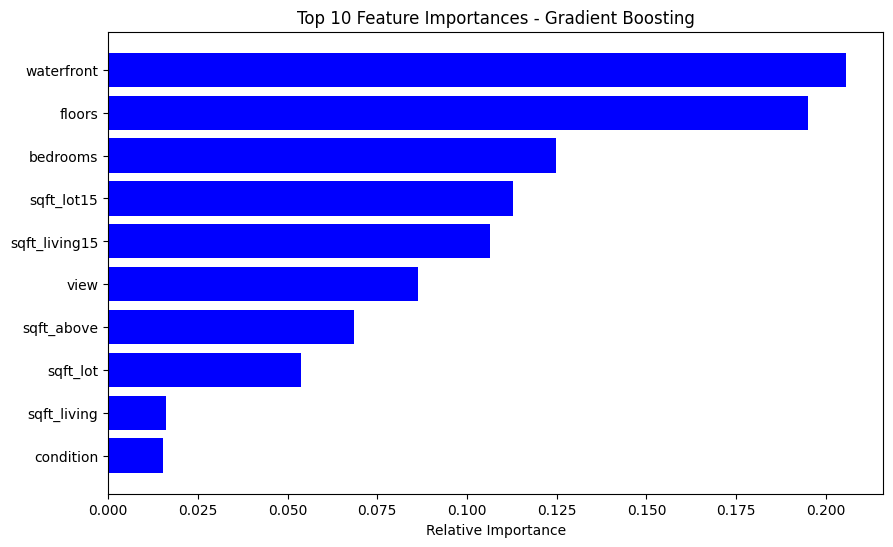

In [7]:
# Visualize predictions vs actual prices
plt.figure(figsize=(15, 6))

# Linear Regression
plt.subplot(1, 2, 1)
plt.scatter(y_test, lr_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Linear Regression: Actual vs Predicted Prices')

# Gradient Boosting
plt.subplot(1, 2, 2)
plt.scatter(y_test, gb_pred, alpha=0.5, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Gradient Boosting: Actual vs Predicted Prices')

plt.tight_layout()
plt.show()

# Feature importance for Gradient Boosting
if hasattr(gb_reg, 'feature_importances_'):
    # Get feature names after one-hot encoding
    feature_names = numerical_cols.copy()
    if categorical_cols:
        ohe = preprocessor.named_transformers_['cat'].named_steps['onehot']
        feature_names += list(ohe.get_feature_names_out(categorical_cols))

    # Plot feature importance
    importance = gb_reg.feature_importances_
    indices = np.argsort(importance)[-10:]  # top 10 features

    plt.figure(figsize=(10, 6))
    plt.title('Top 10 Feature Importances - Gradient Boosting')
    plt.barh(range(len(indices)), importance[indices], color='b', align='center')
    plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
    plt.xlabel('Relative Importance')
    plt.show()